# Project: To predict the sales of weather sensitive products of walmart 
------------------------------------------------------------------------------------------------------------------

## PHASE 2: EDA - train.csv (V2)
------------------------------------------------------------------------------------------------------------------

### Author: Soumen Chatterjee
==================================================================================================================


#### The main goal here is - 

1. Import all the req libraries
2. Review the train.csv data file
3. Clean the dataframe by removing null/0 values, ouliers
4. Do some visualization
5. Saving the cleaned weather file

### Importing all the req. libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn


### Reviewing "train.csv":

In [ ]:
#Loading the data
from google.colab import drive
drive.mount('/content/drive')

df_train = pd.read_csv("/content/drive/MyDrive/Project_TS_Walmart/Phase 2/Data/train.csv")

#Checking how it appears
df_train.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [ ]:
#Checking the base data structure
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   date       object
 1   store_nbr  int64 
 2   item_nbr   int64 
 3   units      int64 
dtypes: int64(3), object(1)
memory usage: 140.9+ MB


In [ ]:
df_train["units"].describe()

count    4.617600e+06
mean     9.868756e-01
std      9.875798e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.568000e+03
Name: units, dtype: float64

In [ ]:
#Changing the index to date column, so that we can convert the data set to time series data set

#Alternate Code:
#df_train = pd.read_csv("/content/drive/MyDrive/Project_TS_Walmart/Phase 2/Data/train.csv", index_col='date', parse_dates=True)

if 'date' in df_train: #Additional check to avoid error
    df_train["date"] = pd.to_datetime(df_train["date"])
    df_train.set_index('date',inplace=True)

df_train.isnull().sum()


store_nbr    0
item_nbr     0
units        0
dtype: int64

In [ ]:
df_train.isnull().sum()
#No Null values across the new dataframe

#Checking if any null values in index
idx = df_train.index
idx.isnull().sum()
#No Null value in train.csv


0

Checking for Null values in Index and in other columns of train.csv

In [ ]:
df_train.store_nbr.unique()
#No Zero value at column store_nbr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 35])

In [ ]:
df_train.item_nbr.unique()
#No Zero value at column item_nbr

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111])

In [ ]:
chkarr = df_train.units.unique()
chkarr.sort()
chkarr
#FOUND Zero value at column item_nbr

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

As ZERO found in "units" column we will need to remove the same

In [ ]:
df_train[df_train['units'] == 0].count()

store_nbr    4498904
item_nbr     4498904
units        4498904
dtype: int64

In [ ]:
#Removing all the rows with 0, and keeping the rows with greater than 0
df_train = df_train[df_train['units'] > 0]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118696 entries, 2012-01-01 to 2014-10-31
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   store_nbr  118696 non-null  int64
 1   item_nbr   118696 non-null  int64
 2   units      118696 non-null  int64
dtypes: int64(3)
memory usage: 3.6 MB


#### Findings 1:
a. 4617600 rows, 4 columns

b. units column have 4498904 rows with 0 value, we will remove those

c. after removing we have 118696 rows, as expected 


# Checking for Outliers

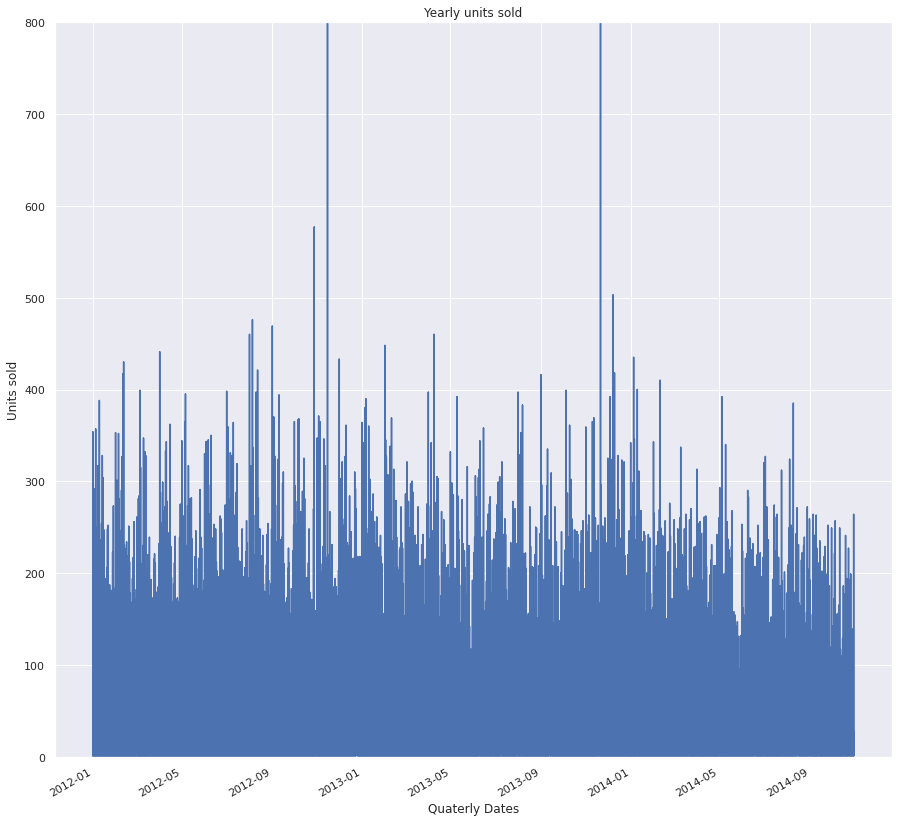

In [ ]:
#Plotting the train.csv
df_train["units"].plot(xlabel='Quaterly Dates', ylabel='Units sold', figsize=(15,15),title="Yearly units sold",ylim=[0,800])

#Clearly few outliers are seen

**Based on the plot created at Cell 48**: 

We are trying to find out how the units sold quarterly, the distribution, outliers.

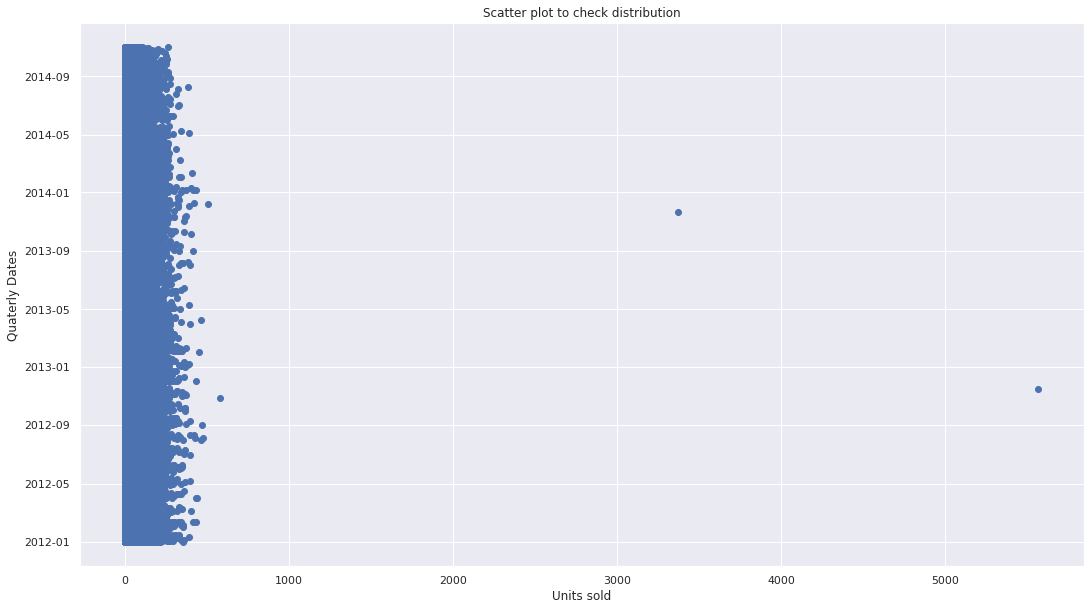

In [ ]:
fig, ax = plt.subplots(figsize = (18,10))
ax.set(xlabel="Units sold", ylabel="Quaterly Dates", title="Scatter plot to check distribution")
ax.scatter(df_train['units'], df_train.index)

**Based on the plot created at Cell 75 - Scatterplot**: 

We are trying to find out how the units sold quarterly, the distribution, outliers. It is mostly well distributed apart from few spikes which can be handled through outliers.

In [ ]:
df_train.sort_values(by = "units", ascending=False).head(20)

,store_nbr,item_nbr,units
date,,,
2012-11-15,37,5,5568
2013-11-21,37,5,3369
2012-10-28,16,25,577
2013-12-08,17,9,503
2012-08-05,33,9,476
2012-09-01,33,44,469
2012-08-01,33,44,460
2013-04-09,17,9,460
2013-02-01,33,44,448


In [ ]:
df_train.sort_values(by = "units", ascending=False).tail(20)

,store_nbr,item_nbr,units
date,,,
2013-05-28,27,21,1
2013-05-28,22,54,1
2013-05-28,11,61,1
2013-05-28,8,100,1
2013-05-28,8,59,1
2013-05-28,7,7,1
2013-05-28,5,20,1
2013-05-28,4,90,1
2013-05-27,39,9,1


In [ ]:
#Mean with outliers
df_train[["units"]].mean(axis=0)

units    38.39217
dtype: float64

In [ ]:
#Median with outliers
df_train[["units"]].median(axis=0)

units    24.0
dtype: float64

(0.0, 300.0)

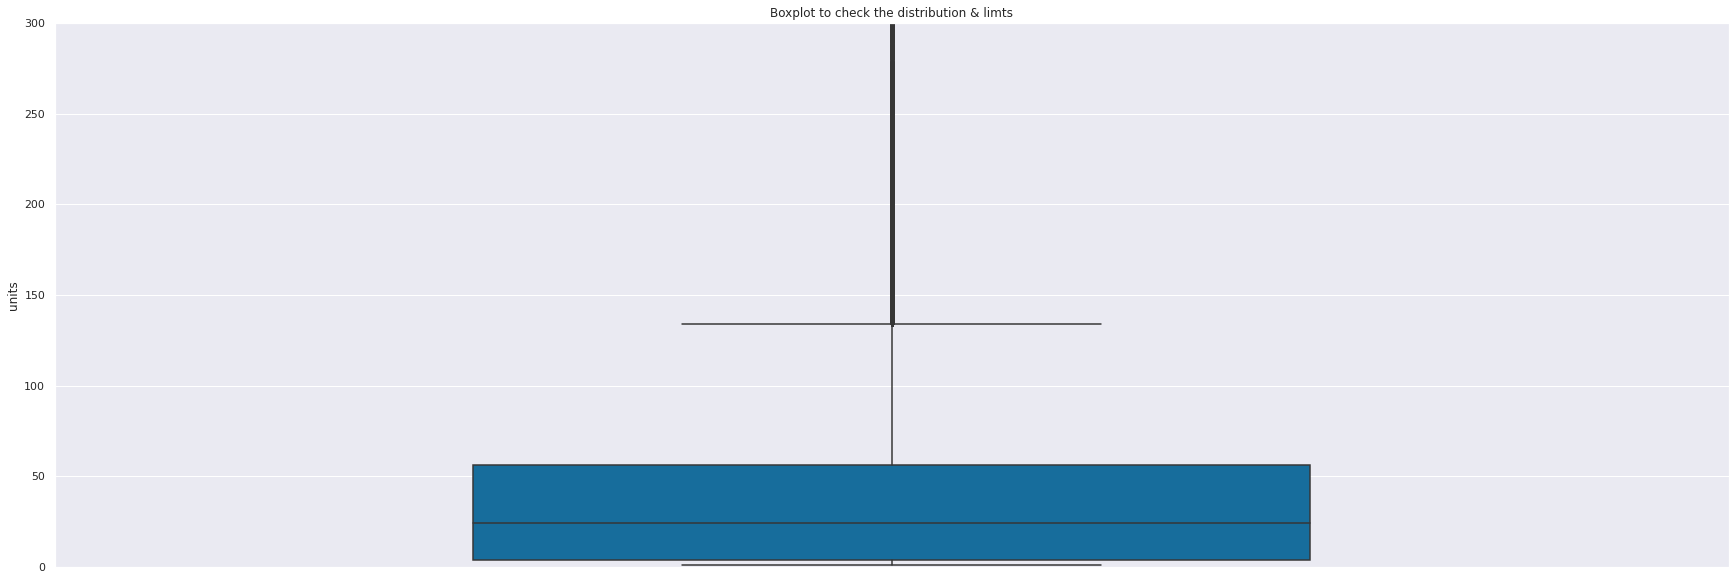

In [ ]:
#df_train.boxplot(figsize=(20,20), column =['units'], grid = True)
bplot=sns.boxplot(y='units', 
                  data=df_train, 
                  width=0.5,
                  palette="colorblind").set(title='Boxplot to check the distribution & limts')

plt.ylim(0, 300)

**Based on the plot created at Cell 209 - Boxplot**: 

We are trying to find out how the overall units sold throughout the timeframe, the distribution, outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, '\nDistribution plot to check the density vs overall units sold\n')]

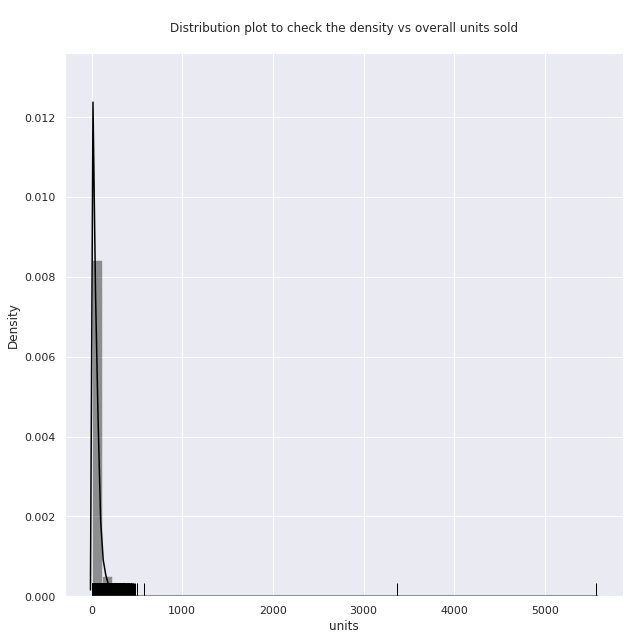

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(df_train["units"],color='black',rug=True).set(title='\nDistribution plot to check the density vs overall units sold\n')

**Based on the plot created at Cell 209 - Distribution**: 

We are trying to find out to check the density vs overall units sold. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


[Text(0.5, 1.0, '\n Violin plot to check to visualize data distributions, displaying the range, median, and distribution of the data.\n')]

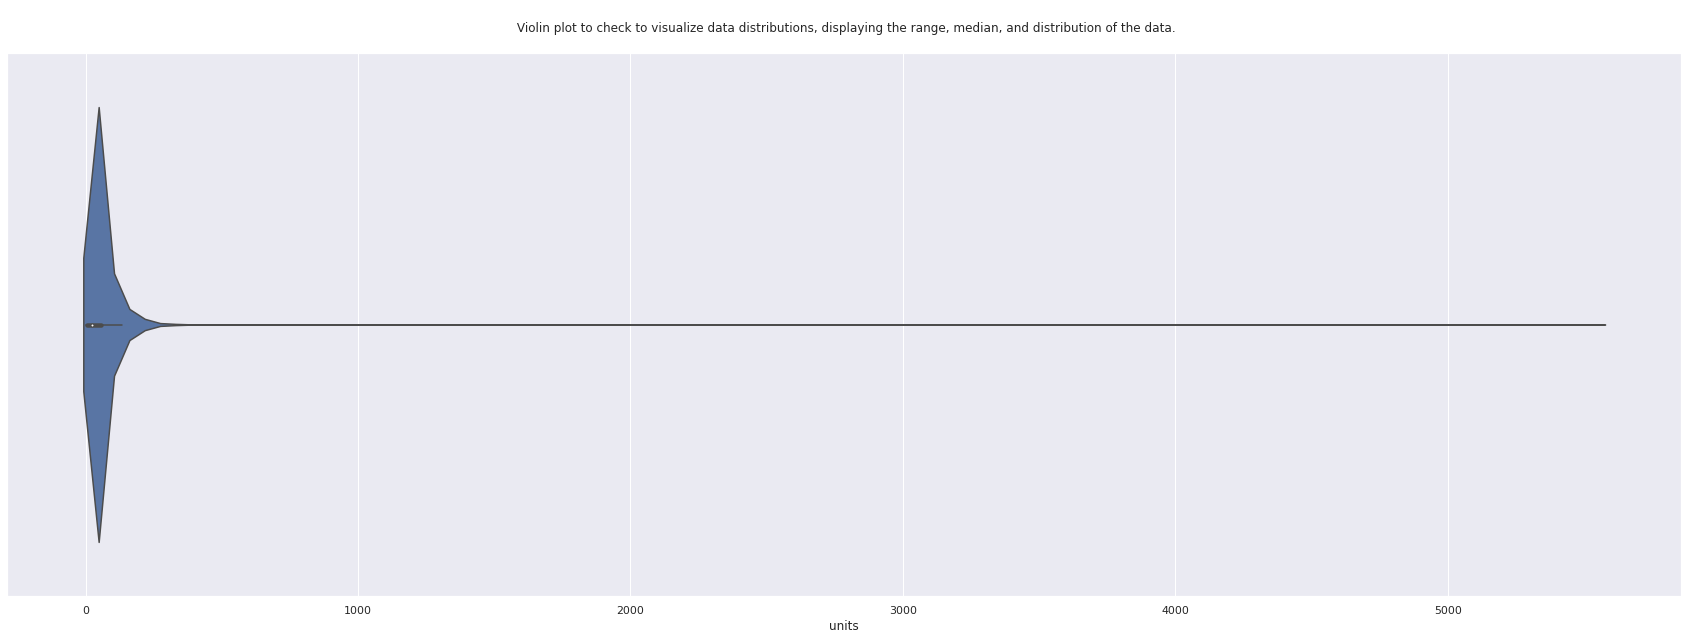

In [ ]:
'''
plt.figure(figsize=(7,7))
plt.violinplot(df_train["units"],showmedians=True)
'''
sns.set(rc={'figure.figsize':(30,10)})
sns.violinplot(df_train["units"],orient='vertical').set(title='\n Violin plot to check to visualize data distributions, displaying the range, median, and distribution of the data.\n')

**Based on the plot created at Cell 231 - Violin**: 

Violin plots used to visualize data distributions, displaying the range, median, and distribution of the data.

Violin plots show the same summary statistics as box plots, but they also include Kernel Density Estimations that represent the shape/distribution of the data.

# **Removing outliers, have used IQR**

In [ ]:
# Z score 
z = np.abs(stats.zscore(df_train['units']))
print(z)

# Position of the outlier
outliers_z = np.where(z > 3)
outliers_z

[0.19340987 0.74941201 0.77000469 ... 0.77000469 0.58467064 0.77000469]


(array([     3,      4,      5, ..., 118097, 118210, 118663]),)

In [ ]:
# Detecting the outliers using IQR and removing them
#As to remove outliers through IQR we will use standard index, so changing the Date time index to standard one
df_train.reset_index(inplace = True)
# Calculating Quantile 1
Q1 = np.percentile(df_train['units'], 25, interpolation = 'midpoint')
# Calculating Quantile 3 
Q3 = np.percentile(df_train['units'], 75, interpolation = 'midpoint')

# IQR
IQR = Q3 - Q1
 
print("Old Shape: ", df_train.shape)

# Upper set
upper = np.where(df_train['units'] >= (Q3+1.5*IQR))
# Lower set
lower = np.where(df_train['units'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_train.drop(upper[0], inplace = True)
#df_train.drop(lower[0], inplace = True) # Keeping the ones
 
print("New Shape: ", df_train.shape)


Old Shape:  (118696, 4)
New Shape:  (113709, 4)


In [ ]:
df_train[["units"]].min(axis=0)

units    1
dtype: int64

In [ ]:
#Changing back the index to date column, so that we can convert the data set to time series data set

if 'date' in df_train: #Additional check to avoid error
    df_train["date"] = pd.to_datetime(df_train["date"])
    df_train.set_index('date',inplace=True)

df_train.index


DatetimeIndex(['2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01',
               ...
               '2014-10-31', '2014-10-31', '2014-10-31', '2014-10-31',
               '2014-10-31', '2014-10-31', '2014-10-31', '2014-10-31',
               '2014-10-31', '2014-10-31'],
              dtype='datetime64[ns]', name='date', length=113709, freq=None)

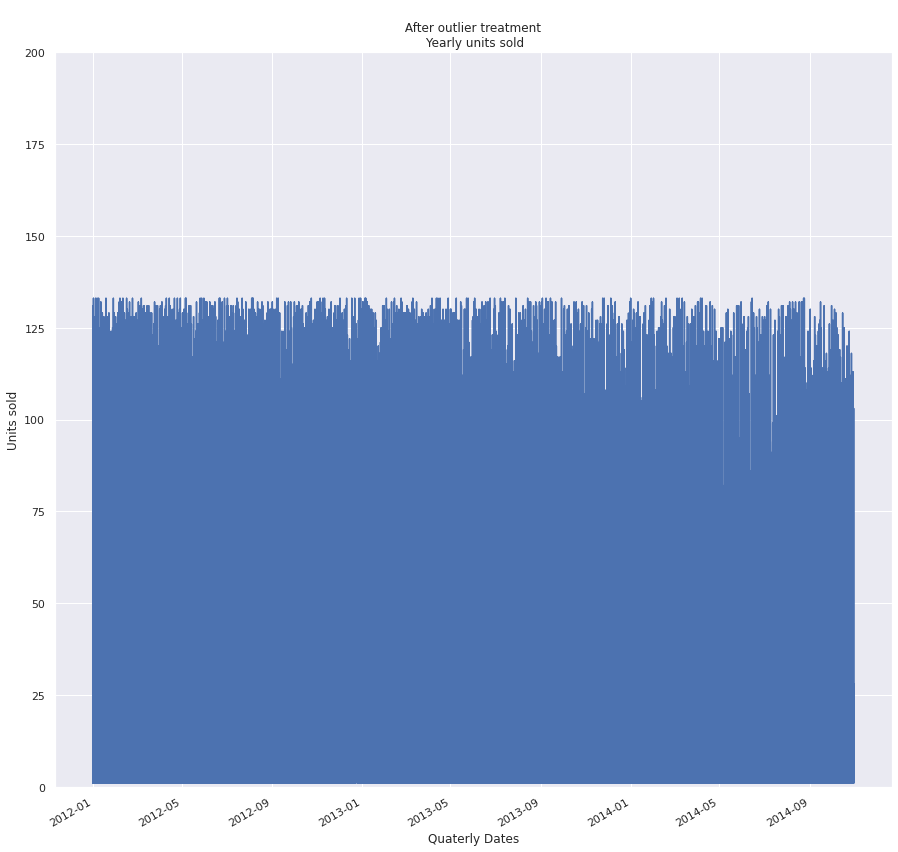

In [ ]:
df_train["units"].plot(xlabel='Quaterly Dates', ylabel='Units sold', figsize=(15,15),title="\n After outlier treatment \n Yearly units sold",ylim=[0,200])


**Based on the Boxplot created at Cell 257, After Outliers removed**

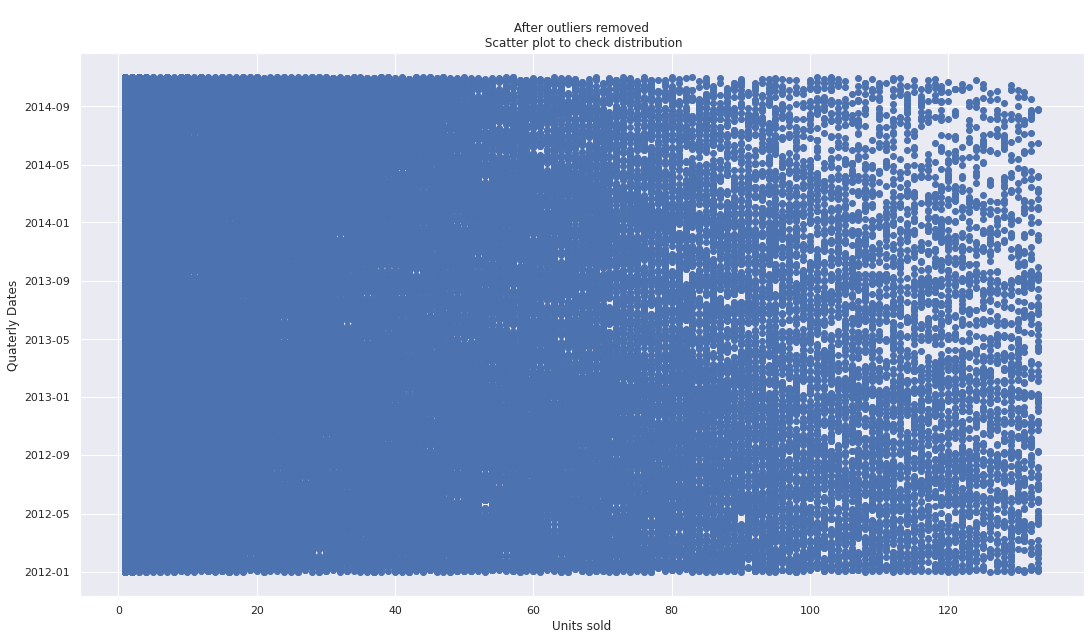

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.set(xlabel="Units sold", ylabel="Quaterly Dates", title="\n After outliers removed \n Scatter plot to check distribution")
ax.scatter(df_train['units'], df_train.index)

**Based on the Scatter plot created at Cell 268, After outliers removed**: 


(0.0, 300.0)

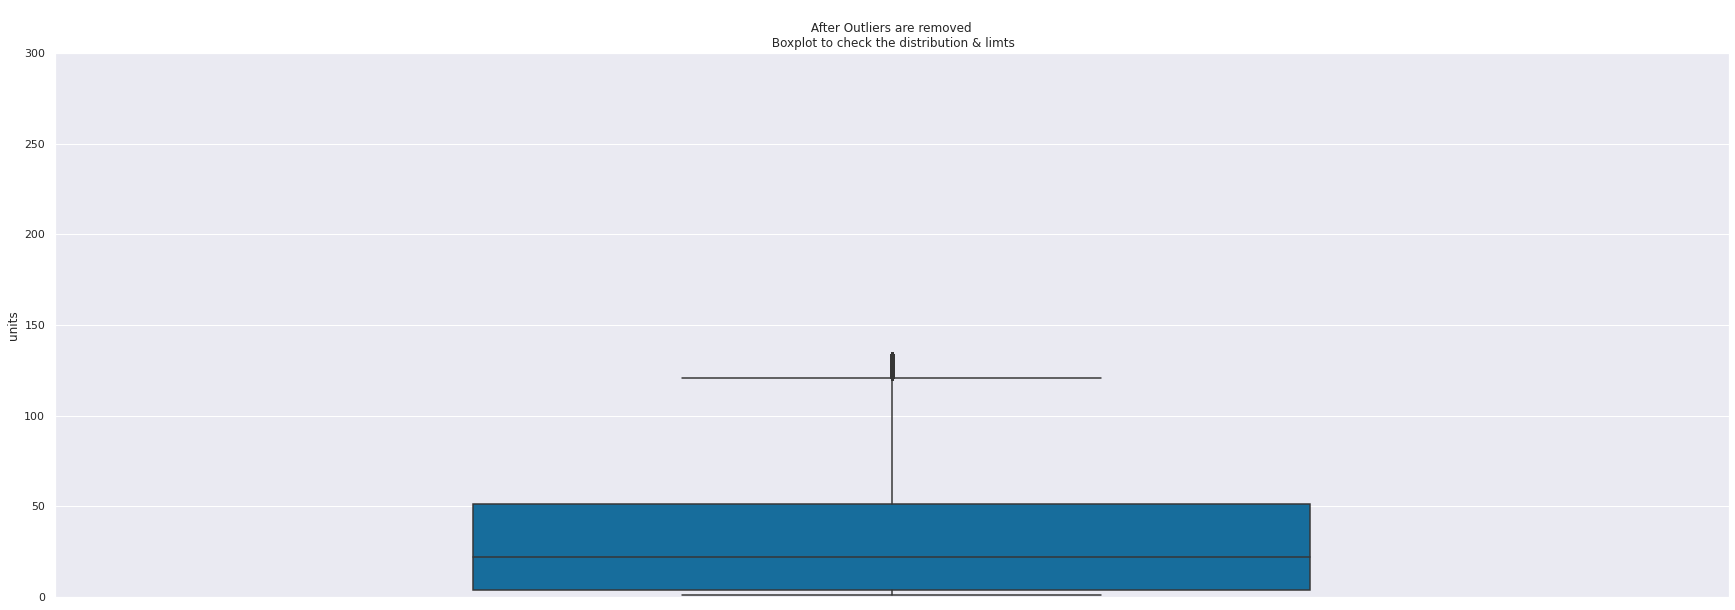

In [ ]:
bplot=sns.boxplot(y='units', 
                  data=df_train, 
                  width=0.5,
                  palette="colorblind").set(title='\n After Outliers are removed \n Boxplot to check the distribution & limts')

plt.ylim(0, 300)


**Based on the plot created at Cell 270 – Boxplot, After Outliers are removed**: 

We are trying to find out how the overall units sold throughout the timeframe, the distribution, outliers. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, '\n After Outliers are removed \n Distribution plot to check the density vs overall units sold\n')]

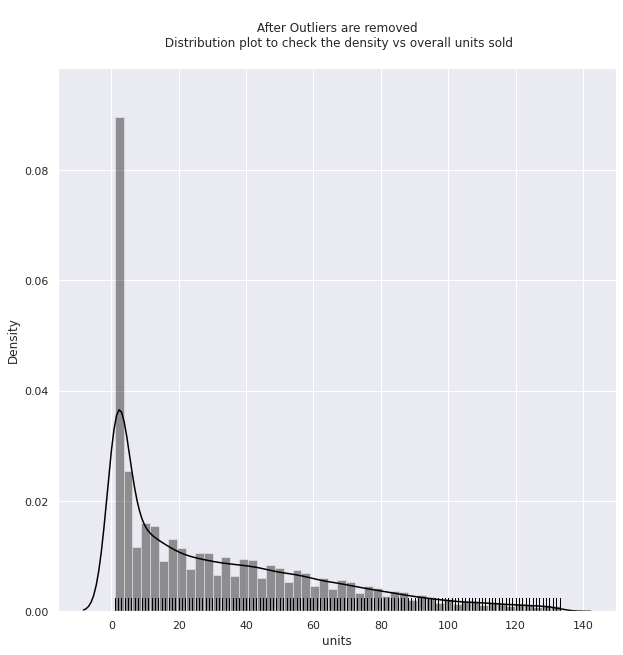

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(df_train["units"],color='black',rug=True).set(title='\n After Outliers are removed \n Distribution plot to check the density vs overall units sold\n')


**Based on the plot created at above Cell - Distribution, After outliers removed**: 

We are trying to find out to check the density vs overall units sold. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


[Text(0.5, 1.0, '\n After Outliers are removed \n  Violin plot to check to visualize data distributions, displaying the range, median, and distribution of the data.\n')]

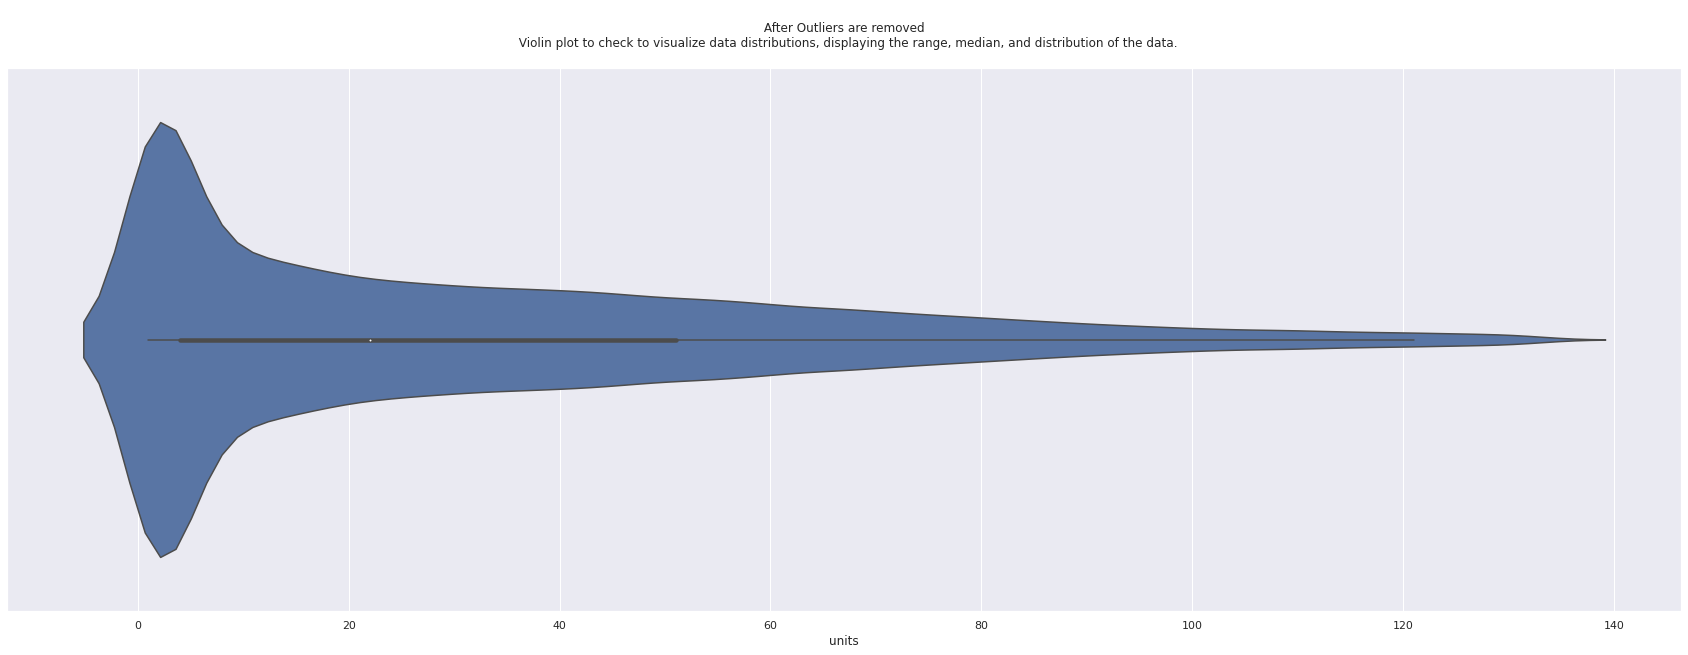

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.violinplot(df_train["units"],orient='vertical').set(title='\n After Outliers are removed \n  Violin plot to check to visualize data distributions, displaying the range, median, and distribution of the data.\n')


**Based on the plot created at Above Cell – Violin, After Outliers removed**: 

Violin plots used to visualize data distributions, displaying the range, median, and distribution of the data.

Violin plots show the same summary statistics as box plots, but they also include Kernel Density Estimations that represent the shape/distribution of the data.


In [ ]:
#Max without outliers
df_train[["units"]].max(axis=0)

units    133
dtype: int64

In [ ]:
#Mean without outliers
df_train[["units"]].mean(axis=0)


units    31.87424
dtype: float64

In [ ]:
#Median with outliers
df_train[["units"]].median(axis=0)


units    22.0
dtype: float64

In [ ]:
df_train.sort_values(by = "units", ascending=False).head(10)


,store_nbr,item_nbr,units
date,,,
2012-01-09,7,5,133
2014-02-18,33,9,133
2013-04-28,15,45,133
2012-10-24,33,44,133
2013-06-24,2,44,133
2012-04-25,17,48,133
2012-11-05,42,5,133
2012-03-07,17,48,133
2012-07-22,31,45,133


In [ ]:
#df_train.sort_values(by = "units", ascending=False).tail(20)

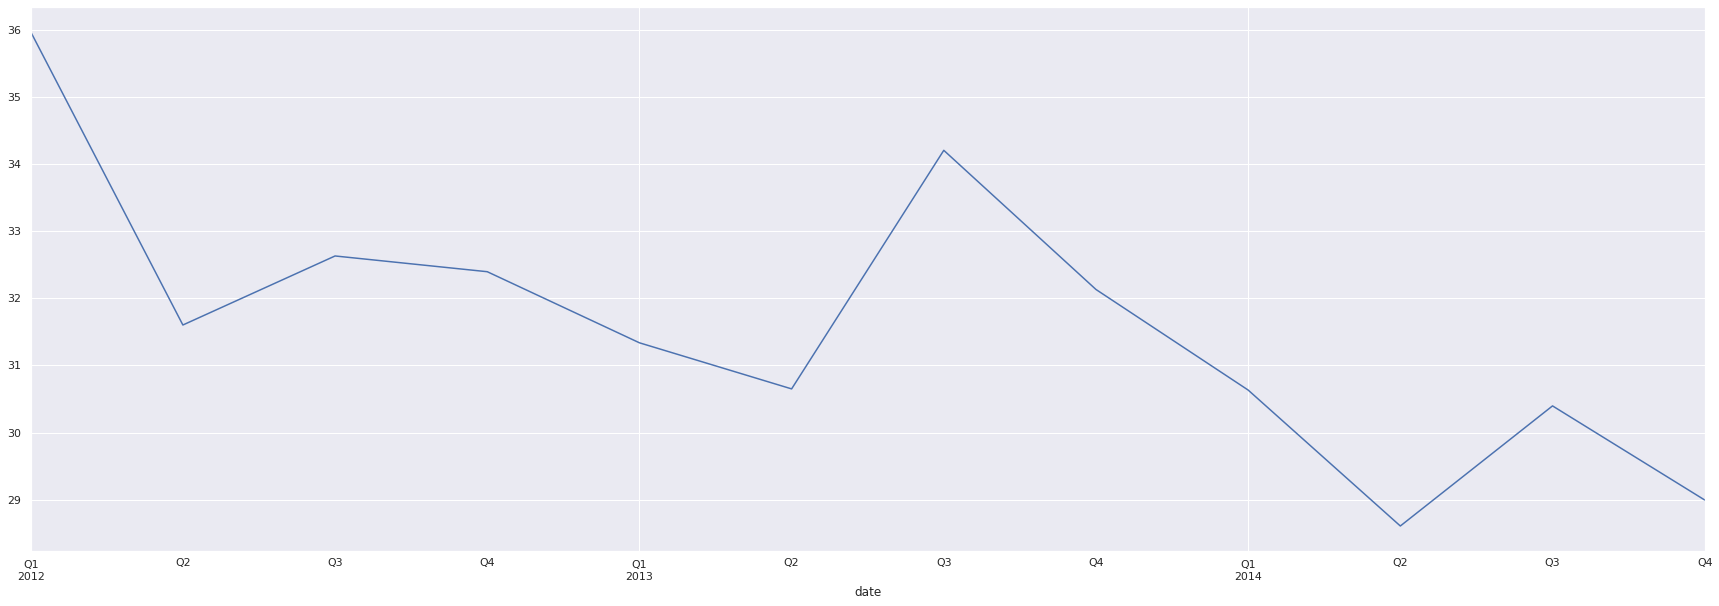

In [ ]:
temp_df_train = df_train["units"].resample(rule='BQ').mean()
temp_df_train.plot()


General trend across all the products - 
1. Is downwards
2. For each year, Q3 sees more sells compared to other quarters 

In [ ]:
df_train.reset_index(inplace = True)

In [ ]:
df_train.to_csv(r'/content/drive/MyDrive/Project_TS_Walmart/Phase 2/Data/train_cleaned.csv', index=False)

In [ ]:
df_train["units"].describe()

count    113709.000000
mean         31.874240
std          31.659757
min           1.000000
25%           4.000000
50%          22.000000
75%          51.000000
max         133.000000
Name: units, dtype: float64